In [14]:
import numpy as np
import os
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp
from collections import deque
import glob, os
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot as plt
from scipy.stats import normaltest
import scikit_posthocs as sp

In [45]:
a = np.array([[1, 2, 3], [4, 5, 6] ,[7, 8, 9]])
print a
stat, p = friedmanchisquare(*(a[i, :] for i in range(a.shape[0])))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')


[[1 2 3]
 [4 5 6]
 [7 8 9]]
Statistics=6.000, p=0.050
Different distributions (reject H0)


In [46]:
homePath="/home/valia/Documents/KnnNoiseExperiments/Friedman_test_Eleni/test"
os.chdir(homePath)
filenames=glob.glob("*.csv")

In [47]:
lists = []

for f in filenames:
    with open(f) as file:
        data = [float(line.strip()) for line in file] 
        lists.append(data)
array = np.array(lists)
print array

[[0.75471698 0.8490566  0.73584906 0.77358491 0.79245283 0.73584906
  0.71698113 0.75471698 0.79245283 0.77358491]
 [0.35897436 0.15217391 0.23255814 0.29268293 0.12765957 0.29268293
  0.35897436 0.12765957 0.15217391 0.26190476]
 [0.8490566  0.73584906 0.77358491 0.64150943 0.77358491 0.73584906
  0.62264151 0.79245283 0.81132075 0.81132075]
 [0.20454545 0.29268293 0.20454545 0.29268293 0.23255814 0.26190476
  0.39473684 0.12765957 0.26190476 0.23255814]
 [0.79245283 0.77358491 0.8490566  0.67924528 0.86792453 0.8490566
  0.67924528 0.75471698 0.73584906 0.69811321]
 [0.39473684 0.26190476 0.26190476 0.23255814 0.26190476 0.20454545
  0.325      0.17777778 0.12765957 0.15217391]
 [0.81132075 0.79245283 0.75471698 0.83018868 0.86792453 0.73584906
  0.83018868 0.77358491 0.81132075 0.77358491]
 [0.17777778 0.12765957 0.15217391 0.12765957 0.10416667 0.17777778
  0.17777778 0.15217391 0.17777778 0.15217391]
 [0.8490566  0.8490566  0.90566038 0.8490566  0.90566038 0.83018868
  0.8490566  

In [48]:
print [array[i, :] for i in range(array.shape[0])]

[array([0.75471698, 0.8490566 , 0.73584906, 0.77358491, 0.79245283,
       0.73584906, 0.71698113, 0.75471698, 0.79245283, 0.77358491]), array([0.35897436, 0.15217391, 0.23255814, 0.29268293, 0.12765957,
       0.29268293, 0.35897436, 0.12765957, 0.15217391, 0.26190476]), array([0.8490566 , 0.73584906, 0.77358491, 0.64150943, 0.77358491,
       0.73584906, 0.62264151, 0.79245283, 0.81132075, 0.81132075]), array([0.20454545, 0.29268293, 0.20454545, 0.29268293, 0.23255814,
       0.26190476, 0.39473684, 0.12765957, 0.26190476, 0.23255814]), array([0.79245283, 0.77358491, 0.8490566 , 0.67924528, 0.86792453,
       0.8490566 , 0.67924528, 0.75471698, 0.73584906, 0.69811321]), array([0.39473684, 0.26190476, 0.26190476, 0.23255814, 0.26190476,
       0.20454545, 0.325     , 0.17777778, 0.12765957, 0.15217391]), array([0.81132075, 0.79245283, 0.75471698, 0.83018868, 0.86792453,
       0.73584906, 0.83018868, 0.77358491, 0.81132075, 0.77358491]), array([0.17777778, 0.12765957, 0.15217391, 0.12

In [49]:
stat, p = friedmanchisquare(*(array[i, :] for i in range(array.shape[0])))
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')


Different distributions (reject H0)


In [50]:
p

1.2316217902304777e-12

In [51]:
stat

75.54812998160638

In [54]:
pc = sp.posthoc_nemenyi_friedman(array)
pc

,0,1,2,3,4,5,6,7,8,9
0,-1.000000,0.9,0.9,0.9,0.9,0.9,0.9,0.702093,0.9,0.9
1,0.900000,-1.0,0.9,0.9,0.9,0.9,0.9,0.900000,0.9,0.9
2,0.900000,0.9,-1.0,0.9,0.9,0.9,0.9,0.900000,0.9,0.9
3,0.900000,0.9,0.9,-1.0,0.9,0.9,0.9,0.900000,0.9,0.9
4,0.900000,0.9,0.9,0.9,-1.0,0.9,0.9,0.900000,0.9,0.9
5,0.900000,0.9,0.9,0.9,0.9,-1.0,0.9,0.900000,0.9,0.9
6,0.900000,0.9,0.9,0.9,0.9,0.9,-1.0,0.900000,0.9,0.9
7,0.702093,0.9,0.9,0.9,0.9,0.9,0.9,-1.000000,0.9,0.9
8,0.900000,0.9,0.9,0.9,0.9,0.9,0.9,0.900000,-1.0,0.9
9,0.900000,0.9,0.9,0.9,0.9,0.9,0.9,0.900000,0.9,-1.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7fbeb0780410>,
 <matplotlib.colorbar.ColorbarBase at 0x7fbeb071dbd0>)

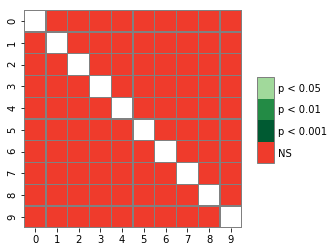

In [55]:
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)